In [4]:
import csv
import numpy as np

filename = 'data/00_NA_Clennett_deposits.csv'

lats, lons, minage = [], [], []

with open(filename) as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        minage.append(int(row[3]))
        
occurrences = []
non_dep_ages = []
        
occurrences = np.bincount(minage)

for n in range(1, len(occurrences)):
    if occurrences[n] == 0:
        non_dep_ages.append(n)

print(non_dep_ages)
random_ages_nondep = np.array(non_dep_ages)
#print(random_ages_nondep)
#print(len(non_dep_ages))
#print((occurrences))

[1, 2, 3, 10, 11, 12, 13, 16, 19, 20, 22, 23, 24, 32, 42, 43, 45, 67, 84, 93, 95, 96, 98, 99, 101, 102, 107, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 165]


In [5]:
#!/usr/bin/env python3

#This is an example script of creating input file for conregistration.py.
#The input file is a text file and contains comma-separated values. 
#Each row has five fields -- index, longitude, latitude, time and plate id.

#The script contains hardcoded file names. 
#You should only use this script as an example and modify the example to prepare input data suitable to your research. 

import os, sys
import numpy as np
import shapefile
from parameters import parameters as param

# the age is a floating-point number. map the floating-point number to the nereast integer time in the range
def get_time_from_age(ages, start, end, step):
    ret=[]
    times=range(start, end+1, step)
    for age in ages:
        age=float(age)
        if age <= start:
            ret.append(start)
        elif age >= end:
            ret.append(end)
        else:
            idx = int((age - start)//step)
            mod = (age - start)%step
            if not (mod < step/2.):
                idx = idx+1 
            ret.append(times[idx])
    return ret 

def run_it():
    start_time = param["time"]["start"]
    end_time = param["time"]["end"]
    time_step =  param["time"]["step"]

    ##if not os.path.isfile('./convergence_data/subStats_0.00.csv'):
        ##sys.exit('ERROR!!! File ./convergence_data/subStats_0.00.csv not found! Run convergence.py first!')

    ##if not os.path.isfile('data/ore_for_coregistration.shp'): #CHANGED BY JULIAN, NEW LOCATION OF NEW SHP FILE
        ##sys.exit('ERROR!!! shp not found! Find the file or change the code to use another file!')


    #load files
    ##f = np.loadtxt('./convergence_data/subStats_0.00.csv') #all subduction points at time 0
    #TODO: choose the points in which you are interested
    ##trench_points=f[(f[:,9])==101] #subduction points in south america #CHANGED BY JULIAN FROM 201 TO 101 TO NA

    ##reader = shapefile.Reader('data/ore_for_coregistration.shp') #CHANGED BY JULIAN, NEW LOCATION OF NEW SHP FILE
    ##recs    = reader.records()
    ##andes_points_len = len(recs)
    andes_points_len = len(minage)
    random_ages_nondep = np.array(non_dep_ages)

    #randomAges=np.random.randint(start_time+1, end_time, size=andes_points_len) #generate random ages for data
    ##times = get_time_from_age(np.array(recs)[:,3], start_time, end_time, time_step) 
    #get integer ages for data, CHANGED FROM 6 TO 3 BY JULIAN FOR USING MY OWN SHP FILE
  
    #index, lon, lat, time, plate id

    positives=[]
    # andes deposit points with the real age
    for i in range(andes_points_len):
        ##data.append([i, recs[i][1], recs[i][2], times[i], recs[i][4]]) #CHANGED BY JULIAN FOR USING MY OWN SHP FILE
        positives.append([i+1, lats[i], lons[i], minage[i]])

    #points_with_age_size=i+1

    # andes deposit points with random ages
    negatives = []
    for i in range(andes_points_len): 
        ##data.append([points_with_age_size+i, lats[i][1], lons[i][2], np.random.choice(random_ages_nondep), recs[i][4]]) #CHANGED FROM 6 TO 3 BY JULIAN FOR USING MY OWN SHP FILE
        #data.append([points_with_age_size+i, lats[i], lons[i], np.random.choice(random_ages_nondep)])
        negatives.append([i+1, lats[i], lons[i], np.random.choice(random_ages_nondep)])
       
    ##points_with_random_age_size=i+1
    
    # trench points for each time step from start_time to end_time
    ##start_idx = points_with_age_size + points_with_random_age_size
    ##i=0
    ##for p in trench_points:
        ##for t in range(end_time):
            ##data.append([start_idx+i, p[0], p[1], t, 101]) 
            ##i+=1
    
    # data are ready and write them to file
    with open('data/01_NA_Clennett_Positives.csv',"w+") as f:
        for row in positives:
            #print(row)
            if row:
                ##f.write('{0:d}, {1:.2f}, {2:.2f}, {3:d}, {4:d}'.format(row[0],row[1],row[2],row[3],row[4]))
                f.write('{0:d}, {1:.2f}, {2:.2f}, {3:d}'.format(row[0],row[1],row[2],row[3]))
            f.write('\n')

    with open('data/01_NA_Clennett_Negatives.csv',"w+") as f:
        for row in negatives:
            #print(row)
            if row:
                ##f.write('{0:d}, {1:.2f}, {2:.2f}, {3:d}, {4:d}'.format(row[0],row[1],row[2],row[3],row[4]))
                f.write('{0:d}, {1:.2f}, {2:.2f}, {3:d}'.format(row[0],row[1],row[2],row[3]))
            f.write('\n')
    
    print('The data have been written successfully!')

if __name__ == '__main__':
    run_it() 
    

The data have been written successfully!


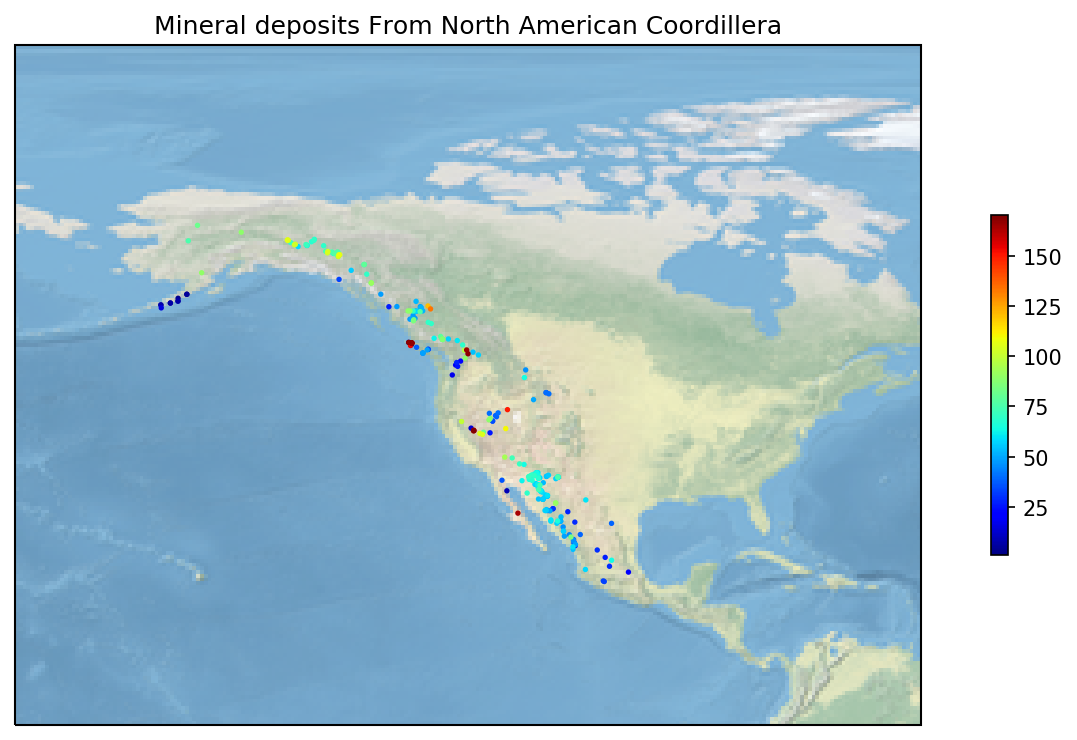

In [7]:
import pandas as pd

data = pd.read_csv('data/01_NA_Clennett_Positives.csv', 
                   ##header=None, names=['index', 'lon', 'lat', 'age', 'plate id'])
                   header=None, names=['index', 'lat', 'lon', 'age'])
data.head()#let's print the first 5 rows


#Now, let's plot a map
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

##trench_file = './convergence_data/subStats_0.00.csv'
##trench_data= np.genfromtxt(trench_file)

fig = plt.figure(figsize=(12,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.set_extent([-85, -30, -55, 15]) #SouthAmerica
ax.set_extent([-180, -60, 0, 90]) #NorthAmerica
#ax.set_extent([-180, 180, -90, 90]) #Globe

#print(len(minage))
data=data[:len(minage)] #ORIGINALY WAS 155 AS AN STRING, I CHANGE IT FOR THE LEN() OF MY CSV FILE
cb = ax.scatter(data['lon'], data['lat'], 10, marker='.',c=data['age'], vmin=1, vmax=170, cmap=plt.cm.jet)
##ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', c=trench_data[:,11], cmap=plt.cm.jet)
plt.title('Mineral deposits From North American Coordillera')
fig.colorbar(cb, shrink=0.5)
plt.show()